Essay:
1. Can you name four of the main challenges in Machine Learning?
2. What is a test set and why would you want to use it?
3. What is the purpose of a validation set?
4. What is cross-validation and why would you prefer it to a validation set?

Jawaban:
1. 4 Main Challenges in Machine Learning:
    a. Insufficient Quantity of Training Data 
    b. Nonrepresentative Training Data
    c. Poor-Quality Data
    d. Irrelevant Features
2. Test set is the data that we use to test the AI program that we have trained using the training set.
3. The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
4. Cross-validation is the technique to avoid "wasting" to much training data in validation sets, where the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts. Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set.

Soal ke-2:

Given data of Singapore Airbnb which can be downloaded in this link
https://www.kaggle.com/jojoker/singapore-airbnb

• From the link above we can define classification and regression case. For example classification case to identify room type or region. While for regression we can identify price of room or review score each month. You can also do clustering from the data above.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### LINEAR REGRESSION

In [5]:
airData = pd.read_csv("listings.csv")
print(airData.dtypes)
print(airData.isna().values.any())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
True


In [28]:
print(airData.isna())

fixedAirData = airData.dropna()
print(len(airData))
print(len(fixedAirData))

         id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0     False  False    False      False                False          False   
1     False  False    False      False                False          False   
2     False  False    False      False                False          False   
3     False  False    False      False                False          False   
4     False  False    False      False                False          False   
...     ...    ...      ...        ...                  ...            ...   
7902  False  False    False      False                False          False   
7903  False  False    False      False                False          False   
7904  False  False    False      False                False          False   
7905  False  False    False      False                False          False   
7906  False  False    False      False                False          False   

      latitude  longitude  room_type  price  minimum_nights  \


            id    host_id  latitude  longitude  price  minimum_nights  \
0        49091     266763   1.44255  103.79580     83             180   
1        50646     227796   1.33235  103.78521     81              90   
2        56334     266763   1.44246  103.79667     69               6   
3        71609     367042   1.34541  103.95712    206               1   
4        71896     367042   1.34567  103.95963     94               1   
...        ...        ...       ...        ...    ...             ...   
7715  37621650   43591543   1.31410  103.90317    699               3   
7728  37690516  165475492   1.34063  103.88219     60               1   
7752  37798739  157856583   1.30677  103.76224     56               1   
7766  37841266   39207304   1.30074  103.84742    237               7   
7767  37852422  119880789   1.39324  103.89002     60               1   

      number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     1               0.01   

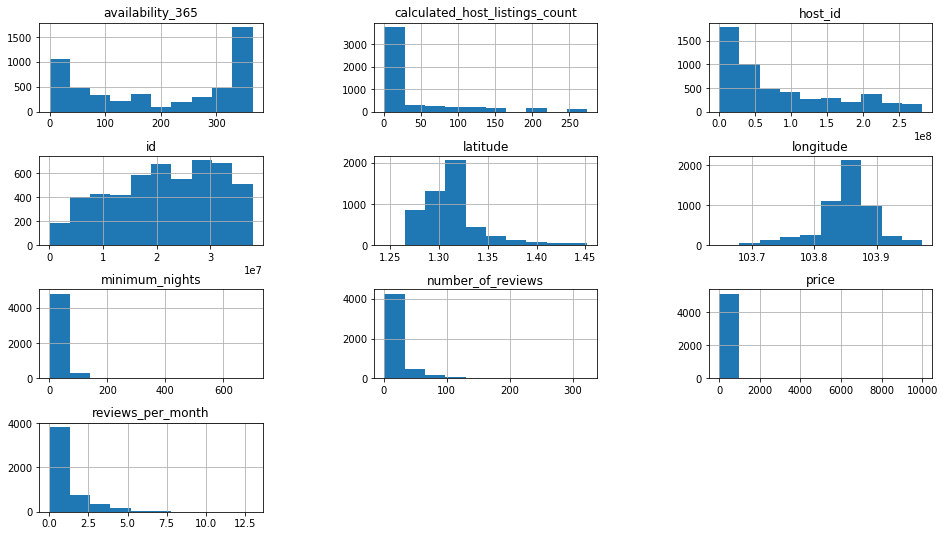

In [32]:
newAirData = fixedAirData[["id", "host_id", "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
print(newAirData)
newAirData.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

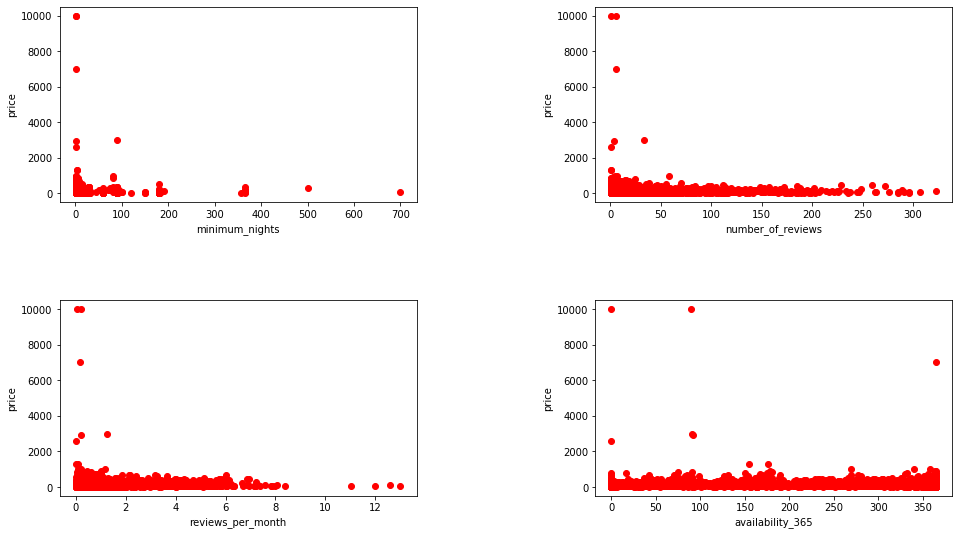

In [35]:
plt.subplot(221)
plt.scatter(newAirData["minimum_nights"], newAirData["price"], color="red")
plt.xlabel("minimum_nights")
plt.ylabel("price")

plt.subplot(222)
plt.scatter(newAirData["number_of_reviews"], newAirData["price"], color="red")
plt.xlabel("number_of_reviews")
plt.ylabel("price")

plt.subplot(223)
plt.scatter(newAirData["reviews_per_month"], newAirData["price"], color="red")
plt.xlabel("reviews_per_month")
plt.ylabel("price")

plt.subplot(224)
plt.scatter(newAirData["availability_365"], newAirData["price"], color="red")
plt.xlabel("availability_365")
plt.ylabel("price")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

In [61]:
train, test = train_test_split(newAirData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["number_of_reviews"]], train[["reviews_per_month"]])

print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)
print(len(train))
print(len(test))

Coefficients:  [[0.02233194]]
Intercept:  [0.6084628]
4118
1030


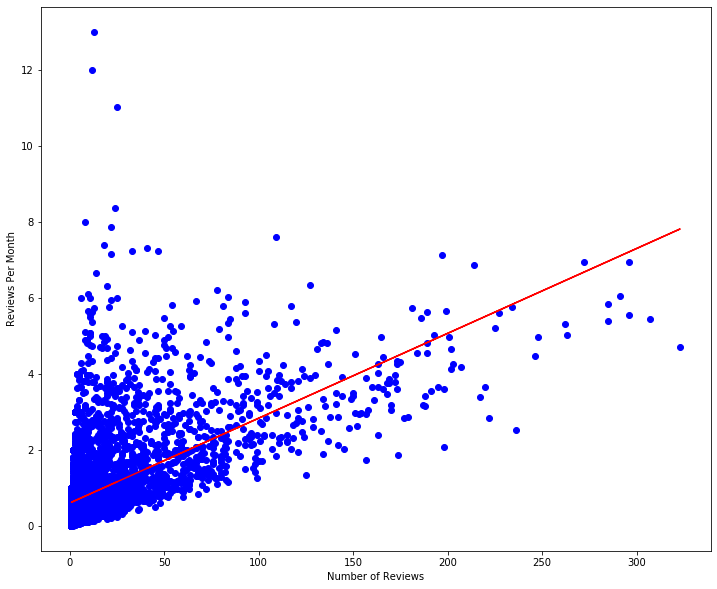

In [67]:
plt.scatter(train["number_of_reviews"], train["reviews_per_month"], color="blue")
plt.plot(train[["number_of_reviews"]], regression.coef_ * train[["number_of_reviews"]] + regression.intercept_, '-r')

plt.xlabel("Number of Reviews")
plt.ylabel("Reviews Per Month")
plt.rcParams["figure.figsize"] = [120,100]
plt.show()

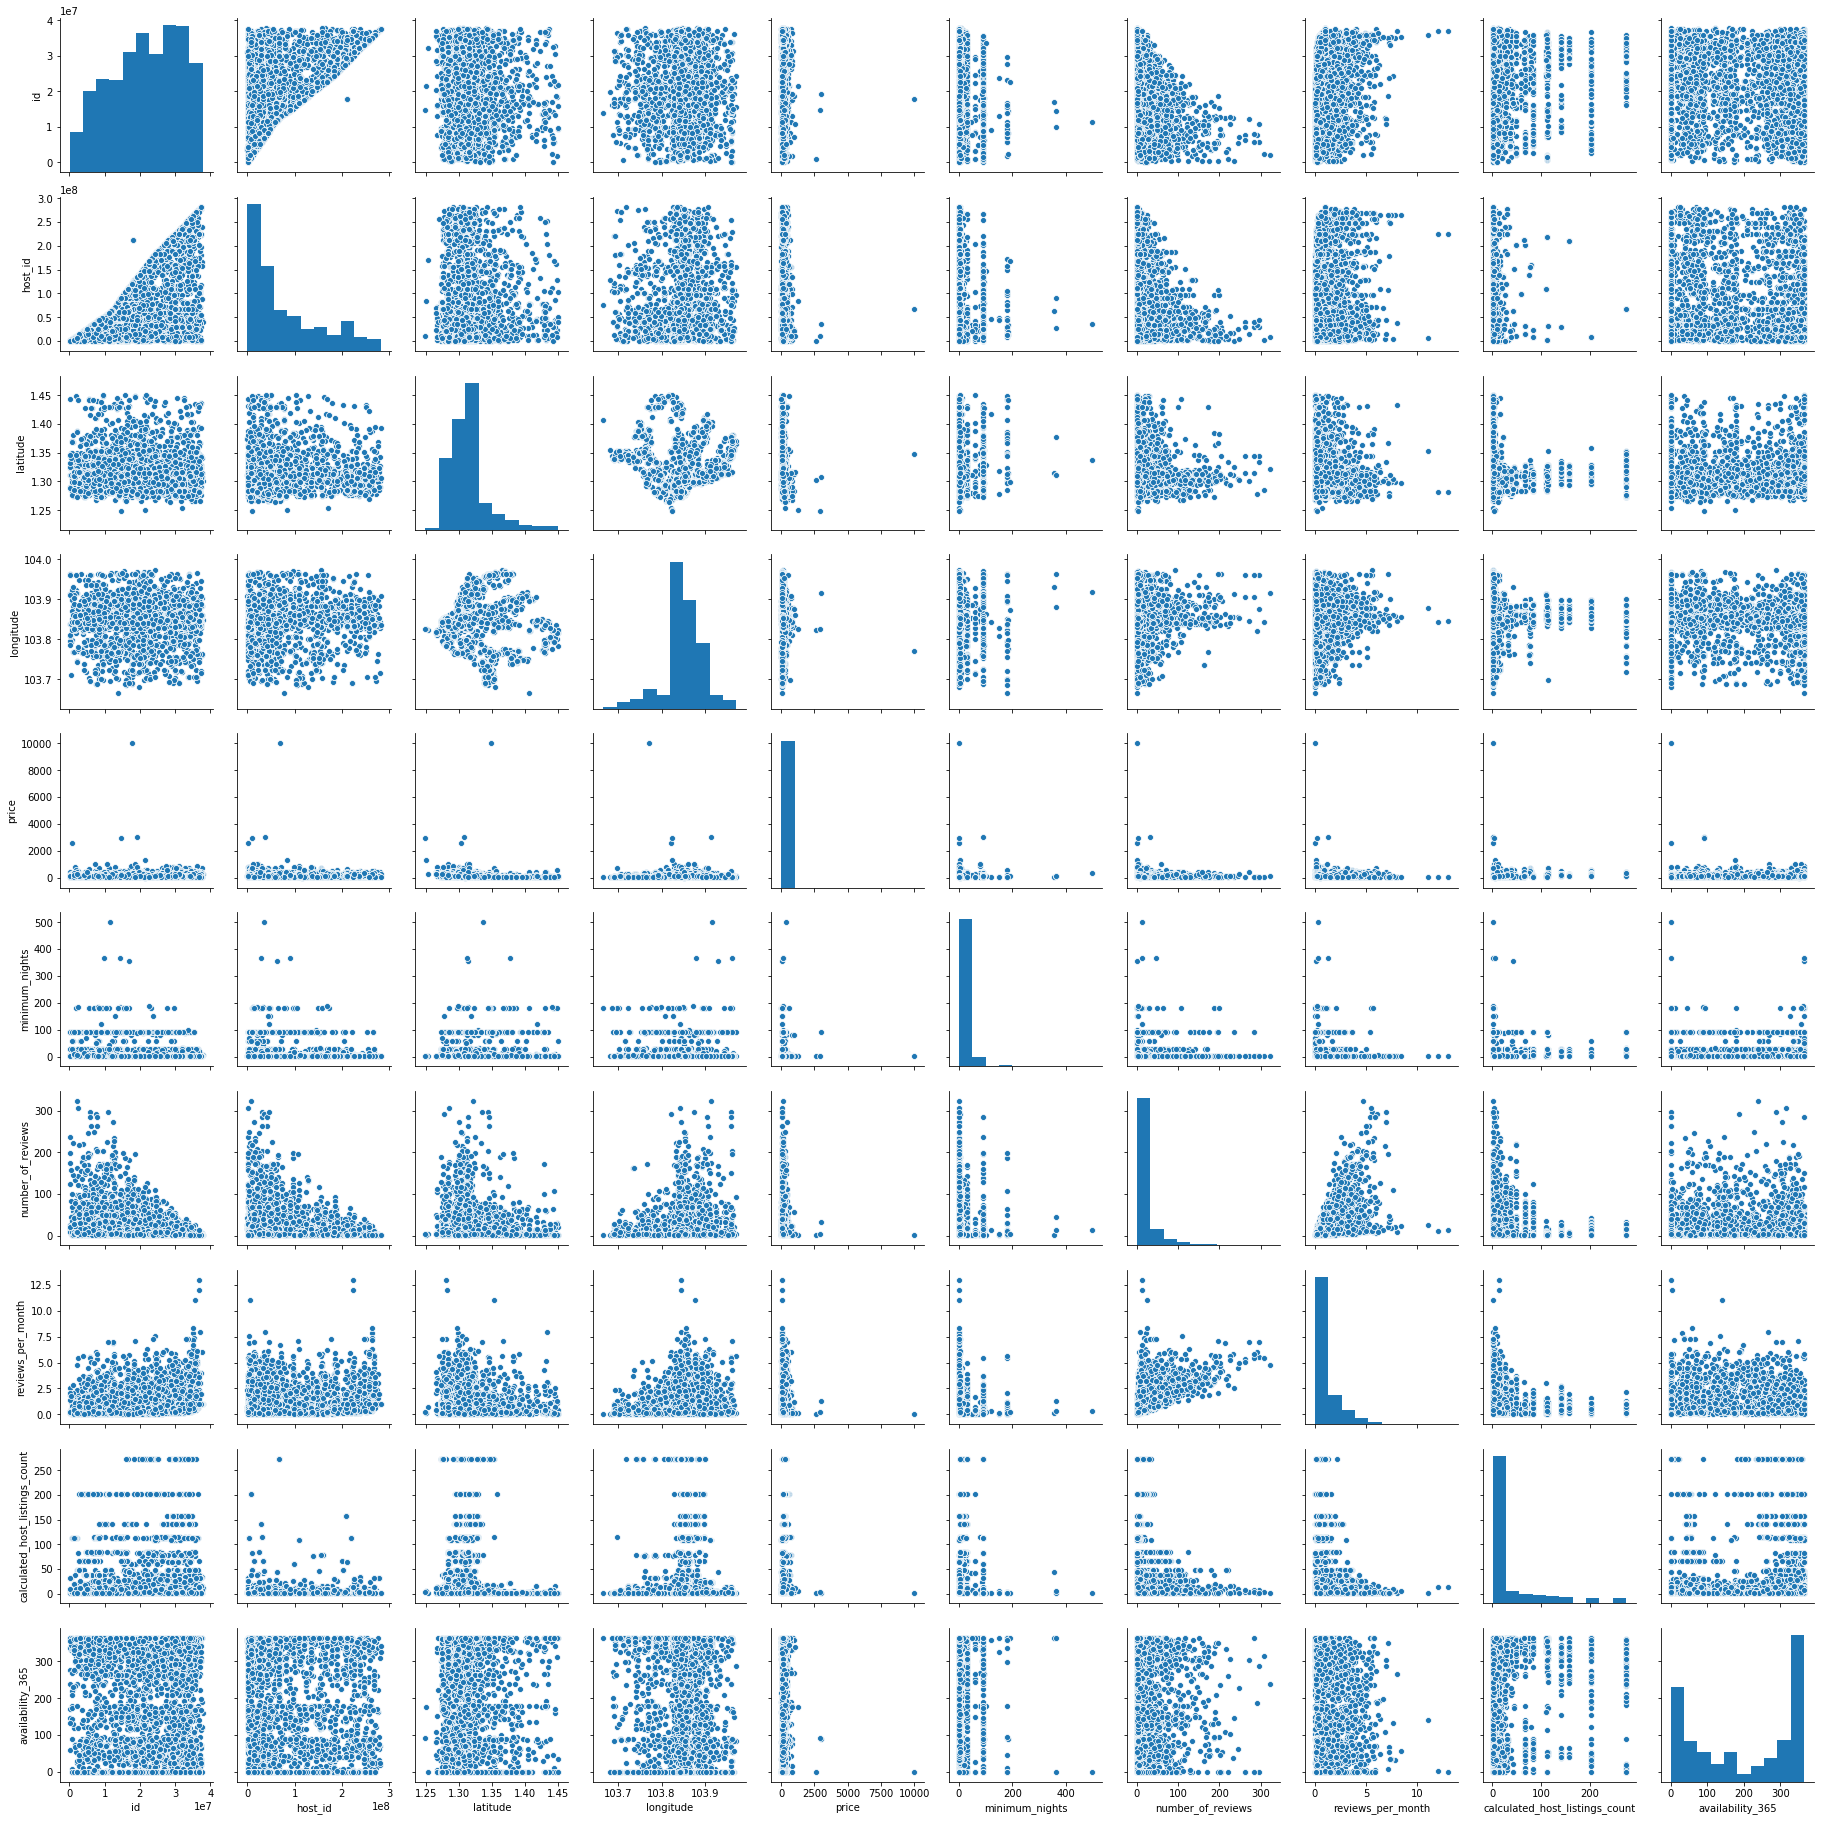

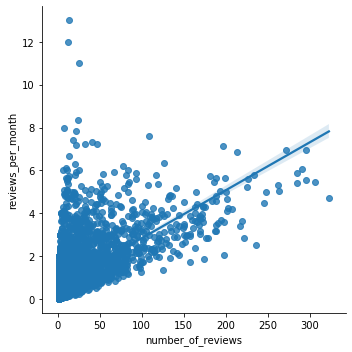

In [68]:
sb.pairplot(train)
sb.lmplot("number_of_reviews", "reviews_per_month", data = train)
plt.show()

In [70]:
prediction = regression.predict(test[["number_of_reviews"]])
for i in range(len(test)):
    print(test[["number_of_reviews"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["reviews_per_month"]], prediction))
print("MSE : ", mean_squared_error(test[["reviews_per_month"]], prediction))
print("R2  : ", r2_score(test[["reviews_per_month"]], prediction))

[25] [1.16676125]
[21] [1.0774335]
[1] [0.63079474]
[2] [0.65312668]
[18] [1.01043768]
[2] [0.65312668]
[77] [2.32802201]
[9] [0.80945024]
[15] [0.94344187]
[19] [1.03276962]
[13] [0.89877799]
[11] [0.85411412]
[2] [0.65312668]
[26] [1.18909319]
[4] [0.69779055]
[50] [1.72505969]
[5] [0.72012249]
[24] [1.14442931]
[1] [0.63079474]
[3] [0.67545862]
[36] [1.41241256]
[9] [0.80945024]
[99] [2.81932464]
[1] [0.63079474]
[16] [0.96577381]
[1] [0.63079474]
[1] [0.63079474]
[82] [2.4396817]
[1] [0.63079474]
[5] [0.72012249]
[79] [2.37268589]
[3] [0.67545862]
[119] [3.2659634]
[1] [0.63079474]
[20] [1.05510156]
[37] [1.4347445]
[6] [0.74245443]
[4] [0.69779055]
[34] [1.36774869]
[16] [0.96577381]
[13] [0.89877799]
[2] [0.65312668]
[24] [1.14442931]
[4] [0.69779055]
[100] [2.84165658]
[1] [0.63079474]
[8] [0.78711831]
[1] [0.63079474]
[7] [0.76478637]
[2] [0.65312668]
[44] [1.59106807]
[2] [0.65312668]
[1] [0.63079474]
[32] [1.32308481]
[1] [0.63079474]
[3] [0.67545862]
[2] [0.65312668]
[44] [1

[2] [0.65312668]
[29] [1.256089]
[8] [0.78711831]
[2] [0.65312668]
[13] [0.89877799]
[1] [0.63079474]
[23] [1.12209737]
[12] [0.87644606]
[2] [0.65312668]
[21] [1.0774335]
[2] [0.65312668]
[43] [1.56873613]
[1] [0.63079474]
[35] [1.39008063]
[1] [0.63079474]
[20] [1.05510156]
[21] [1.0774335]
[2] [0.65312668]
[2] [0.65312668]
[1] [0.63079474]
[40] [1.50174031]
[37] [1.4347445]
[1] [0.63079474]
[5] [0.72012249]
[71] [2.19403039]
[8] [0.78711831]
[1] [0.63079474]
[1] [0.63079474]
[2] [0.65312668]
[5] [0.72012249]
[9] [0.80945024]
[1] [0.63079474]
[7] [0.76478637]
[33] [1.34541675]
[2] [0.65312668]
[8] [0.78711831]
[113] [3.13197177]
[2] [0.65312668]
[1] [0.63079474]
[2] [0.65312668]
[2] [0.65312668]
[1] [0.63079474]
[7] [0.76478637]
[1] [0.63079474]
[14] [0.92110993]
[114] [3.15430371]
[3] [0.67545862]
[34] [1.36774869]
[2] [0.65312668]
[1] [0.63079474]
[49] [1.70272775]
[1] [0.63079474]
[1] [0.63079474]
[2] [0.65312668]
[9] [0.80945024]
[44] [1.59106807]
[1] [0.63079474]
[5] [0.72012249

#### CLASSIFICATION

In [71]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [72]:
airData2 = pd.read_csv("listings.csv")

for i in airData2:
    print(i, airData[i].dtypes)
    if airData[i].isna().values.any() and airData[i].dtypes != object:
        airData[i] = airData[i].fillna(airData[i].mean())

train, test = train_test_split(airData, test_size=0.1)

id int64
name object
host_id int64
host_name object
neighbourhood_group object
neighbourhood object
latitude float64
longitude float64
room_type object
price int64
minimum_nights int64
number_of_reviews int64
last_review object
reviews_per_month float64
calculated_host_listings_count int64
availability_365 int64


In [91]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["latitude", "longitude"]], train["calculated_host_listings_count"])

In [92]:
newClassification = KNN.predict([[50.44255, 70.79580],[.31410, 103.90317]])
print(newClassification)

classification = KNN.predict(test[["latitude", "longitude"]])
accuracy = accuracy_score(test["calculated_host_listings_count"], classification)
MAE = mean_absolute_error(test["calculated_host_listings_count"], classification)
MSE = mean_squared_error(test["calculated_host_listings_count"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)

[1 1]
 ACC : 0.30
 MAE : 30.99
 MSE : 4371.82


In [93]:
Ks = 10
accuracy = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
    KNN = KNeighborsClassifier(n_neighbors = n).fit(train[["latitude", "longitude"]], train["calculated_host_listings_count"])
    classification = KNN.predict(test[["latitude", "longitude"]])
    accuracy[n-1] = accuracy_score(test["calculated_host_listings_count"], classification)

print("Best ACC : %.2f" % accuracy.max(), ", with k = ", accuracy.argmax() + 1)

Best ACC : 0.32 , with k =  4
